
# Project: Investigate a TDMB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

in this data analysis report i'm going to investigate a set of data of tmbd movies to answer 2 main questions:


1- what are the popular genres of each year?


2- what are the popular features of high revenue movies?
 
**and i'm taking this in details right below:**

In [39]:
import pandas as pd 
import matplotlib.pyplot as  plt 
import numpy as np 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [40]:
df_1=pd.read_csv('tmdb_5000_credits.csv')
df=pd.read_csv('tmdb_5000_movies.csv')
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [41]:
df_1.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


**let's merge both of files into one consistent file "df"**

In [42]:
df['cast']=df_1['cast']
df['crew']=df_1['crew']
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [43]:
df.shape

(4803, 22)

In [44]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [45]:
df.isnull().sum().sum()

3941

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

### Data Cleaning (Replace this with more specific notes!)

_1 -clean missing data_


**Most of missing data are in the homepages so they couldn't be filled so i have to drop them**

In [47]:
df.drop('homepage',axis=1,inplace=True)
df.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


**same goes with the tagline missing data because it couldn't be filled**

In [48]:
df.drop('tagline',axis=1,inplace=True)
df.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


**we still have some few missing data so i'm going to drop them too **

In [49]:
df.dropna(axis=0,inplace=True)

**check for missing data**

In [50]:
df.isnull().sum().any()

False

_2- clean douplicated data_

In [51]:
df.duplicated().sum()

0

**cut un wanted data**

- according to my analysis we don't need the movie id data so i will dro that too 

In [52]:
df.drop('id',axis=1,inplace=True)

In [53]:
df.head(2)

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


**no missing or repeated data so my file is ready to explore**

<a id='eda'></a>
## Exploratory Data Analysis

**Data visuals**

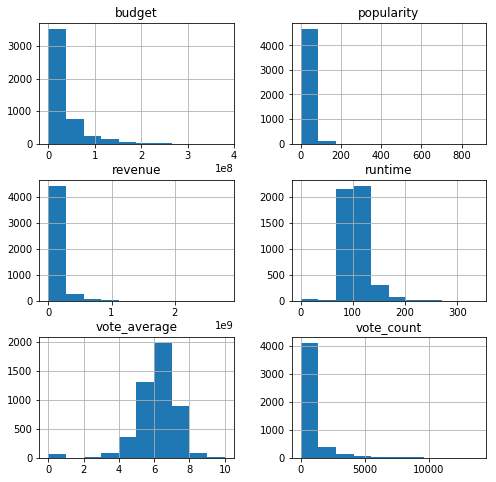

In [54]:
df.hist(figsize=(8,8));

### Research Question 1 (what are popular genres for each year)

In [55]:
years=[]
df_list=[]
df['release_date']=pd.to_datetime(df['release_date'])


for i in df['release_date'].dt.year:
    years.append(i)    
years=list(set(years))


for year in years :
       for y in df['release_date'].dt.year:
            if year == y:
                      df_list.append({'year':year, 'genre':df['genres'].loc[df['release_date'].dt.year==y]})
            else :
                     continue
                    
                    
df_genres=pd.DataFrame(df_list,columns=['year', 'genre'])
df_genres.drop_duplicates('year',inplace=True)

df_genres['index']=list(range(len(df_genres['year'])))

df_genres.set_index('index')

,year,genre
index,,
0,1916,"4592 [{""id"": 18, ""name"": ""Drama""}] Name: ge..."
1,1925,"4661 [{""id"": 18, ""name"": ""Drama""}, {""id"": 1..."
2,1927,"2638 [{""id"": 18, ""name"": ""Drama""}, {""id"": 8..."
3,1929,"4457 [{""id"": 18, ""name"": ""Drama""}, {""id"": 5..."
4,1930,"3804 [{""id"": 28, ""name"": ""Action""}, {""id"": ..."
5,1932,"3611 [{""id"": 18, ""name"": ""Drama""}, {""id"": 1..."
6,1933,"4570 [{""id"": 10402, ""name"": ""Music""}, {""id""..."
7,1934,"4604 [{""id"": 35, ""name"": ""Comedy""}, {""id"": ..."
8,1935,"4495 [{""id"": 35, ""name"": ""Comedy""}, {""id"": ..."


**now we have a dataframe containing each year with it's popular genre of movies**

### Research Question 2  (what are the common features of the highest revenue movies)

In [56]:
df['revenue'].describe()

count    4.799000e+03
mean     8.232920e+07
std      1.629076e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.918402e+07
75%      9.295652e+07
max      2.787965e+09
Name: revenue, dtype: float64

**lets study some of the revnue behavior with change of other given data**

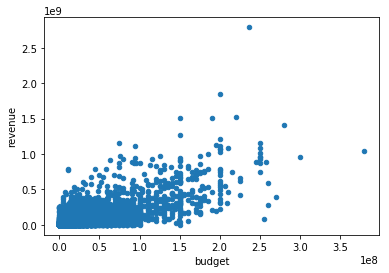

In [57]:
df.plot(x='budget',y='revenue',kind='scatter');

*1- from the figure above we can see that relationship of revenue/budget of the movies is linear so best revnue movies maybe has bigger budgets*

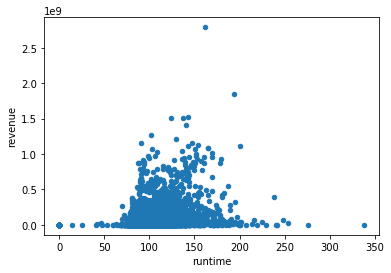

In [58]:
df.plot(x='runtime',y='revenue',kind='scatter');

*2- from the figure above we can see that biggest revnues are for the movies which have runtime between 100-150 minutes*

In [59]:
df.groupby('original_language')['revenue'].mean()

original_language
af    9.879971e+06
ar    0.000000e+00
cn    3.374016e+07
cs    0.000000e+00
da    2.989889e+07
de    1.449890e+07
el    1.101970e+05
en    8.651726e+07
es    1.865218e+07
fa    2.250000e+05
fr    1.246151e+07
he    3.708616e+06
hi    7.447231e+06
hu    0.000000e+00
id    2.274881e+06
is    1.100000e+01
it    3.262532e+06
ja    6.602892e+07
ko    2.535645e+07
ky    0.000000e+00
nb    4.159678e+06
nl    6.680779e+06
no    1.984662e+06
pl    1.070000e+07
ps    0.000000e+00
pt    4.026498e+06
ro    5.928915e+05
ru    9.510074e+06
sl    0.000000e+00
sv    0.000000e+00
ta    0.000000e+00
te    1.000000e+08
th    1.203408e+07
tr    0.000000e+00
vi    6.390000e+05
xx    5.526056e+07
zh    4.173498e+07
Name: revenue, dtype: float64

*3- from the above info we can see that biggest mean revnues are for movies with lnguages:*

1 - af (Afrikaans)

2 - ru(Russian)

3 - en(english)

4 - hi(Hindi)

<a id='conclusions'></a>
## Conclusions
we had a set of movies data after cleaning and fitting our data we had 2 main questions: 


**1- what are the popular genres of each year of movie releasing ?**

**2- what make the max revenue of each movie ?**

so, after providing the suitable answers i have to say that was amazing to work on and i'm waiting for your feed back.


In [61]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0